# DISCLAIMER: I am by no means legally able to give any kind of health advice.  I am not a doctor of any kind, nor do I claim to be.  Take this analysis for what it is.  Please do not take this as advice or try to input information to see if you have diabetes.

##This is the notebook that will serve as the analysis and model building of the Pima Native Americans datasets from Kaggle.

<h3>Goals of this project</h3>
- Develop a strong structure to follow, as in a framework so I have the ability to use this a guide for future projects.

- Commit to GitHub so I can track my progress

- Foster my intuition on which plots are the best for certain types of data

- Standardize and normalize data quickly

- Feature Engineering ideas?

- Practice modularizing my code to make it easier to use

#Questions

- What kind of data are dealing with - structured or unstructred?
  - Structured data for sure

- Does the data have categorical, numerical, ordinal, or time series data?
  - Numerical

- What are my feature variables (inputs) and what are my target variables (outputs)?
  - The feature variables are here:
    - Pregnancy count
    - Glucose level
    - BloodPressure
    - SkinThickness
    - Insulin
    - BMI
    - DiabetesPedigreeFunction
    - Age

- Are we missing any data?
  - Thankful no!

- Are we dealing with outliers?
  - Sure are, we will handle this in the notebook


#Data Dictionary

* *FYI: Everyone person in this dataset is a woman at age 21 or higher*

| Column | Meaning | Thoughts |
|------- | ------- | -------- |
|Pregnancies | Number of times pregnant | An integer.  What is the min and what is the max?  |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Measured in mmol/L?  1 mmol/L = 18 mg/dL.  I need to multiply by 18 to get the measurement for the HOMA IR Score|
|Blood Pressure | Diastolic blood pressure | mm Hg.  Can we figure out the systolic?  The number we are given is the second one -- 120/80 |
|SkinThickness | Triceps skin fold thickness (mm) | This seems kinda normal|
|Insulin | 2 hour serum insuling (muU/ml) | Measured in muU/ml.|
|BMI | Body mass index (weight in kg/(height in meters)<sup>2</sup> | Traditional measurement |
|Diabetes Pedigree | Diabetes Pedigree Function | A function used to determine whether you have diabetes given your family history |
|Age | Age in years| This is a normal whole integer |
|Outcome | Class variable (0 or 1) 268 of 768 are 1, the others are 0|  We have an imbalance so we can handle that but let's start without that|

**Future Enhancement for Feature Engineering**
HOMA - IR Blood Code 
- Insulin * Glucose = HOMA-IR
- Healthy is 0.5 - 1.5
- Less than 1.0 means you are insulin- sensitive, which is optimal
- A range of 1 - 1.9 is within "Normal limits"
- Above 1.9 indicates early insuling resistance
- Above 2.9 indicates significant signal resistance

#Models

What models do I want to use?
  - Dense network
  - Random Forrest
  - Logistic Regression
  - SVM
  - XGBoosst


##Import the libraires and then lets get into the data and see what we need to work on

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons

from sklearn import preprocessing, svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint

import xgboost as xgb

from google.colab import files

import os

%matplotlib inline

In [2]:
#Let's upload the csv
uploaded = files.upload()

diabetes = pd.read_csv("diabetes.csv")
print(diabetes.head())

Saving diabetes.csv to diabetes (2).csv
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [3]:
def background_check(dataframe):
  '''
  Summary: This function serves as a way to have a basic understanding of the data before we do any work on it

  Description: The purpose of this is too develop the underlying intution using pandas dataframes in order to
               understand the data.  As Andrej Kapathy says, "Become one with the data"

  Parameters: dataframe

  Return: None, but it does print a bunch of data for us to read
  '''
  
  print("#" * 100)
  print(dataframe.head())

  print("#" * 100)
  print(dataframe.info())

  print("#" * 100)
  print(dataframe.describe)

  print("#" * 100)
  print(dataframe.tail())

  print("#" * 100)
  print(dataframe.columns)

  print("#" * 100)
  print(dataframe.dtypes)

  print("#" * 100)
  print(dataframe.shape)

background_check(diabetes)

####################################################################################################
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
####################################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1 

#Make a few graphs shall we - EDA

Types of graphs to make
  - Corr
  - Countplot (https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn")
  - Distplot
  - Histogram
  - Line (plot)
  - Scatter




#Correlations with SNS

In [4]:
def correlations_with_sns():
  '''
  Summary: This will make a coorelation plot in seaborn for us

  Description: This correlation will allow us to understand the underlying intuition behind what data has meaning on other data

  Parameters: Non

  Return: None, however it will make a useful graph for us
  '''

  corr = diabetes.corr(method = "pearson")

  fig, ax = plt.subplots(figsize = (14, 5))

  #Make a heatmap and then rotate the xticks to make it easier to read
  sns_corr = sns.heatmap(corr, annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", linecolor = "black", linewidths = 3, cbar_kws = {"orientation": "vertical"})
  sns_corr.set_xticklabels(sns_corr.get_xticklabels(), rotation = 35)

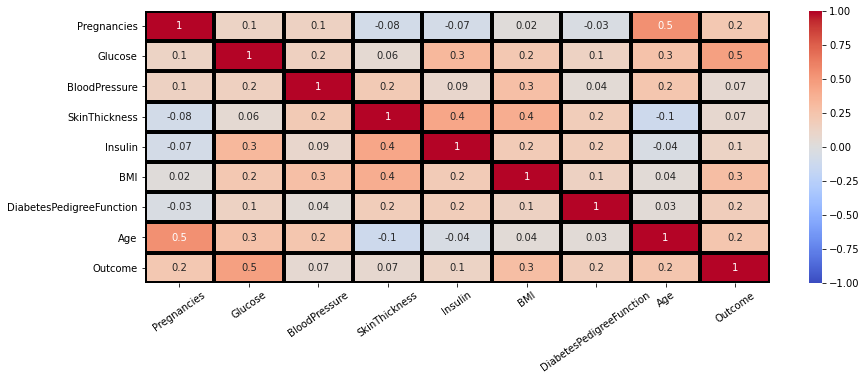

In [5]:
correlations_with_sns()

Correlations are a great way to have a feel for the data with a few lines of code.  

We can see a few correlations such as: 
  - Pregnancies and age
  - Glucose and your diabetic outcome
  - Insulin and glucose
  - Age and glucose
  - Skin thickness and insulin
  - Skin thickness and BMI

These correlations make sense intuitively too.  There are not too many surprises here, but it is good to know what is related to what.

#Count Plots

- What is a count plot?  A count plot will feel like a bar chart but we can also use the hue to show us the relation of having diabetes or not based on the specific column.

- For example, the pregnancies column will show us how many people had zero pregnanices and how many of do not have diabetes and how many of them do

In [6]:
def countplots():
  fig, ax_count = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 20))

  pregnancies_sns_countplot = sns.countplot(x = diabetes["Pregnancies"], ax = ax_count[0][0], data = diabetes, hue = "Outcome")
  ax_count[0][0].set_title("Pregnancy Count")
  pregnancies_sns_countplot.tick_params(axis = "x", which = "major")

  skin_thickness_sns_countplot = sns.countplot(x = diabetes["SkinThickness"], ax = ax_count[0][1], data = diabetes, hue = "Outcome")
  ax_count[0][1].set_title("SkinThickness")
  skin_thickness_sns_countplot.tick_params(axis = "x", which = "major")
 
  blood_pressure_sns_countplot = sns.countplot(x = diabetes["BloodPressure"], ax = ax_count[1][0], data = diabetes, hue = "Outcome")
  ax_count[1][0].set_title("BloodPressure")
  blood_pressure_sns_countplot.tick_params(axis = "x", which = "major")

  age_sns_countplot = sns.countplot(x = diabetes["Age"], ax = ax_count[1][1], data = diabetes, hue = "Outcome")
  ax_count[1][1].set_title("Age")
  age_sns_countplot.tick_params(axis = "x", which = "major")
  
  fig.tight_layout()
  plt.show()

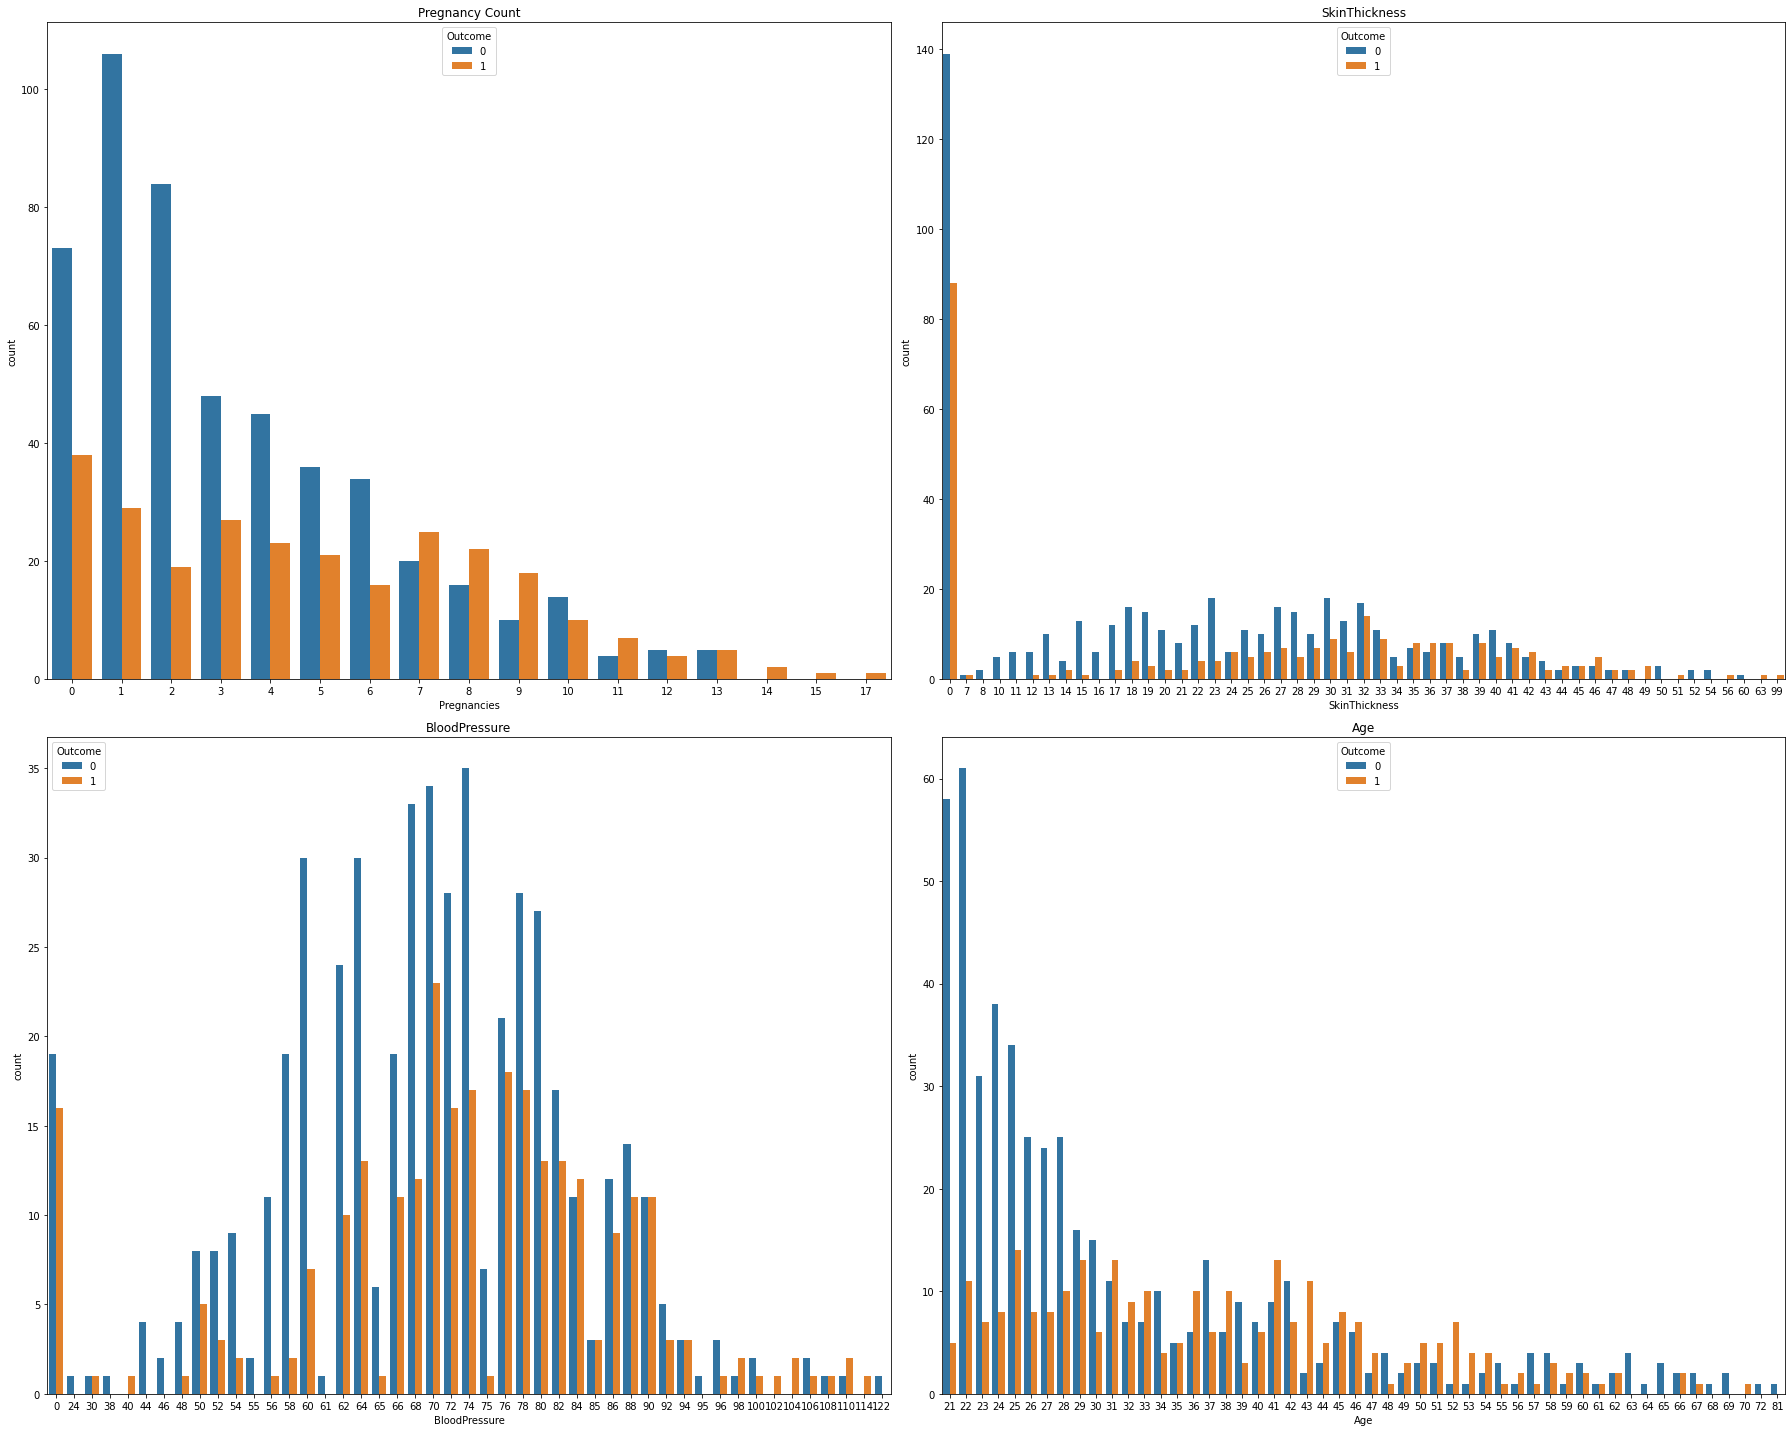

In [7]:
countplots()

What are the noticeable attributes?
- Maybe the more pregnancies a woman has the more likely she is to develop diabetes later?  That is odd.  Maybe that is some kind of anomaly?

- Skin thickness is showing that the thicker your skin is the more likely you are to have diabetes.
  - Intuitively, this seems right.  The thicker your skin the more likely you are to be overweight and this leads to type 2 diabetes typically.

- Blood pressure feels somewhat normal.  The healthier your blood pressure the less likely you are to develop diabetes.

- Age is showing us the younger you are the more likely it is you do not have diabetes, and as you age it seems to be more likely or balance out depending on your age.

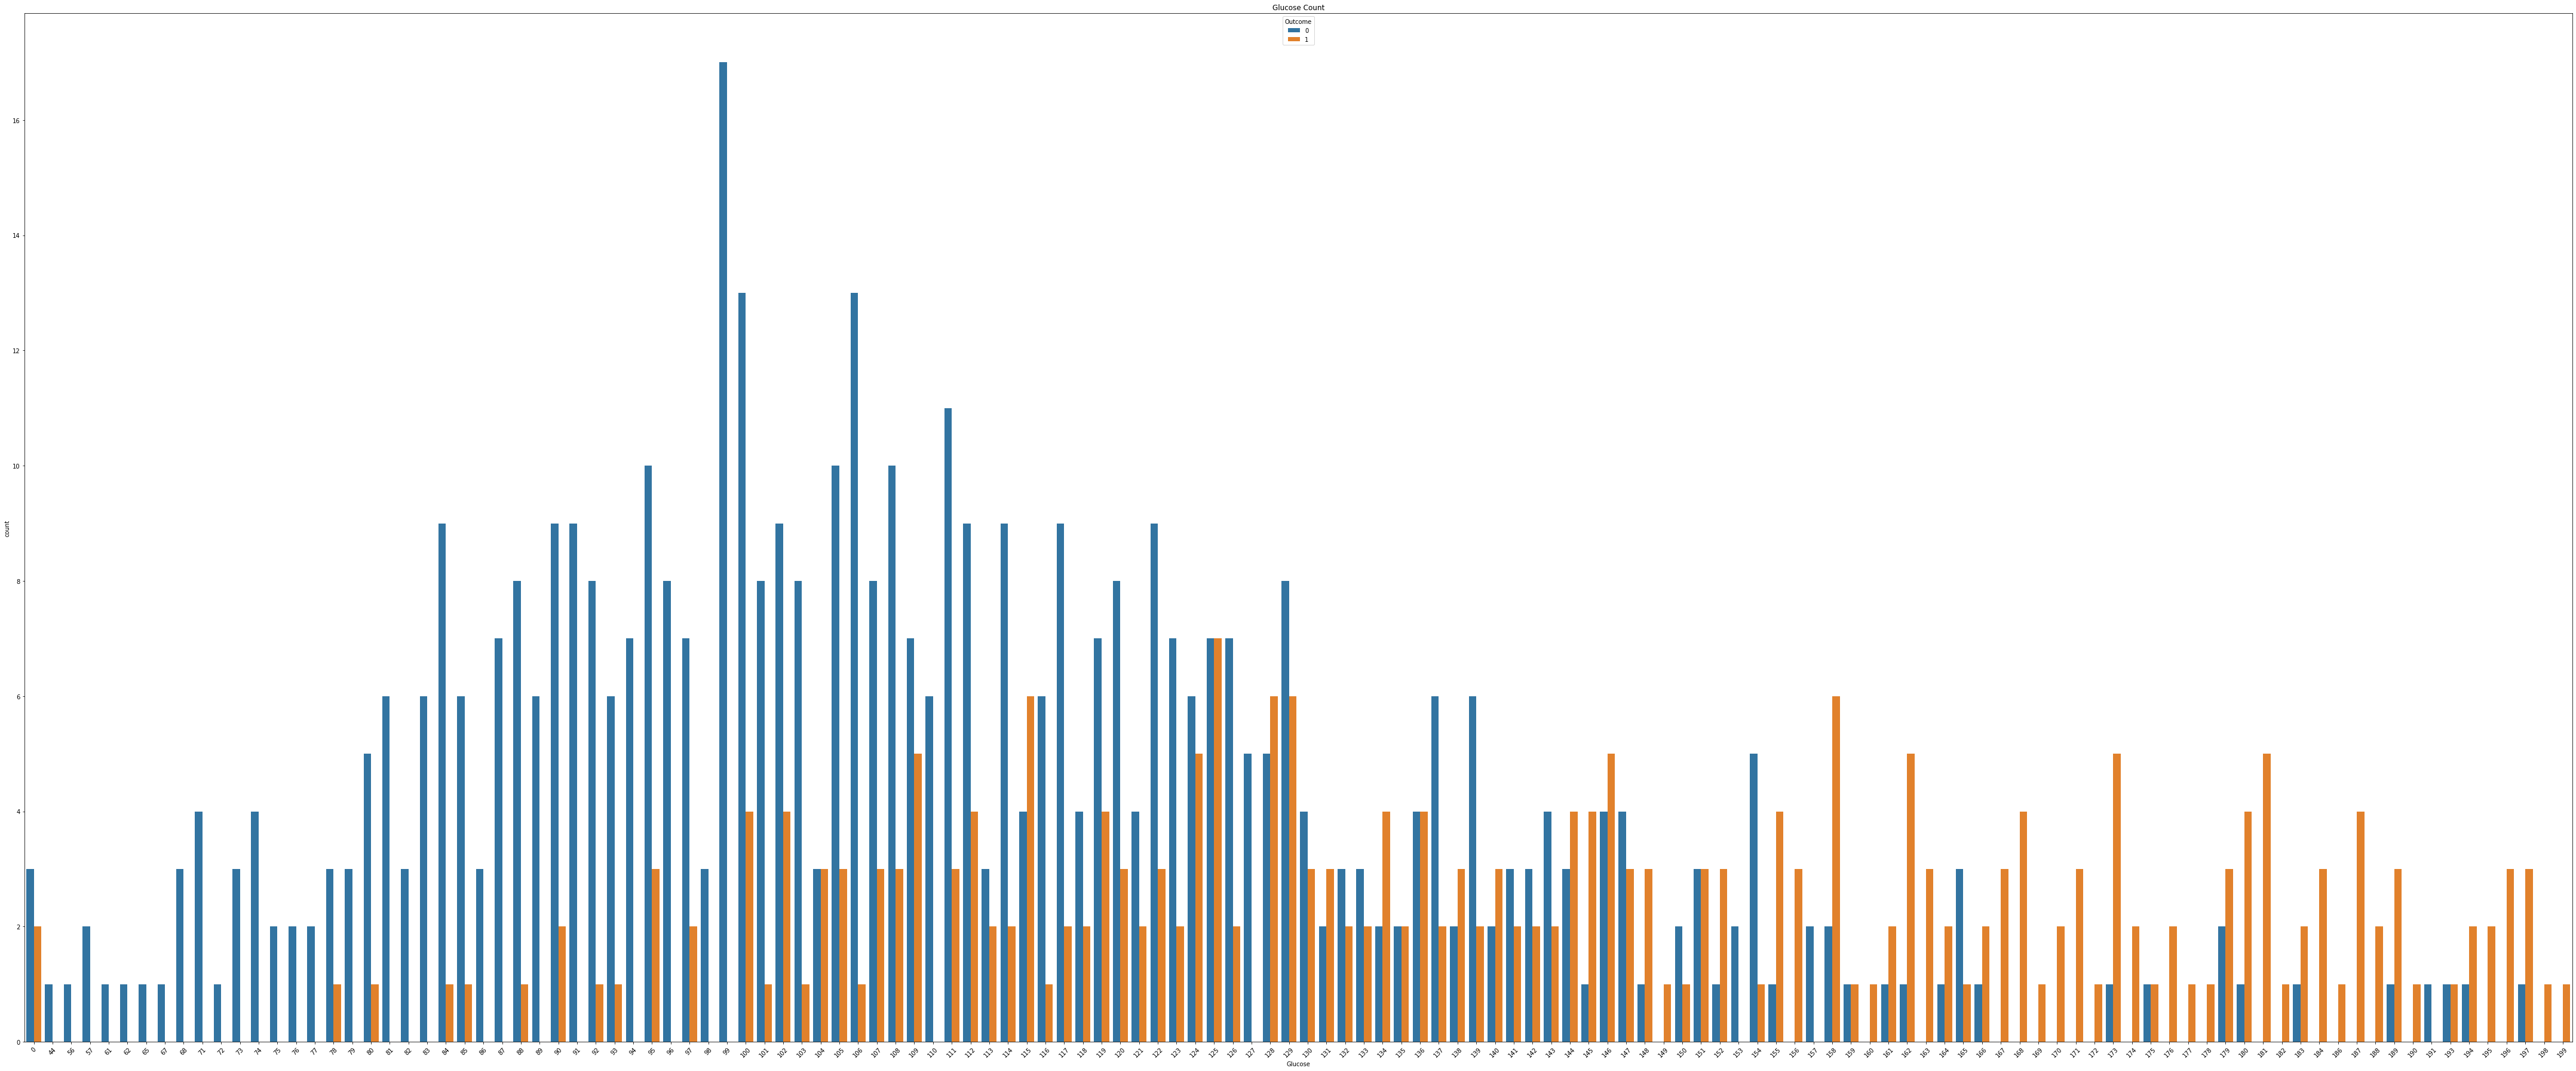

In [8]:
'''
  The glucose count plot was huge so I separated it
'''

#Glucose
fig, ax_count_glucose = plt.subplots(nrows = 1, figsize = (60, 25))

glucose_sns_countplot = sns.countplot(x = diabetes["Glucose"], ax = ax_count_glucose, data = diabetes, hue = "Outcome")
ax_count_glucose.set_title("Glucose Count")
glucose_sns_countplot.tick_params(axis = "x", which = "major")
glucose_sns_countplot.set_xticklabels(glucose_sns_countplot.get_xticklabels(), rotation = 45)


fig.tight_layout()
plt.show()

This glucose chart is pretty big so I separated it from the rest.  Next up is insulin

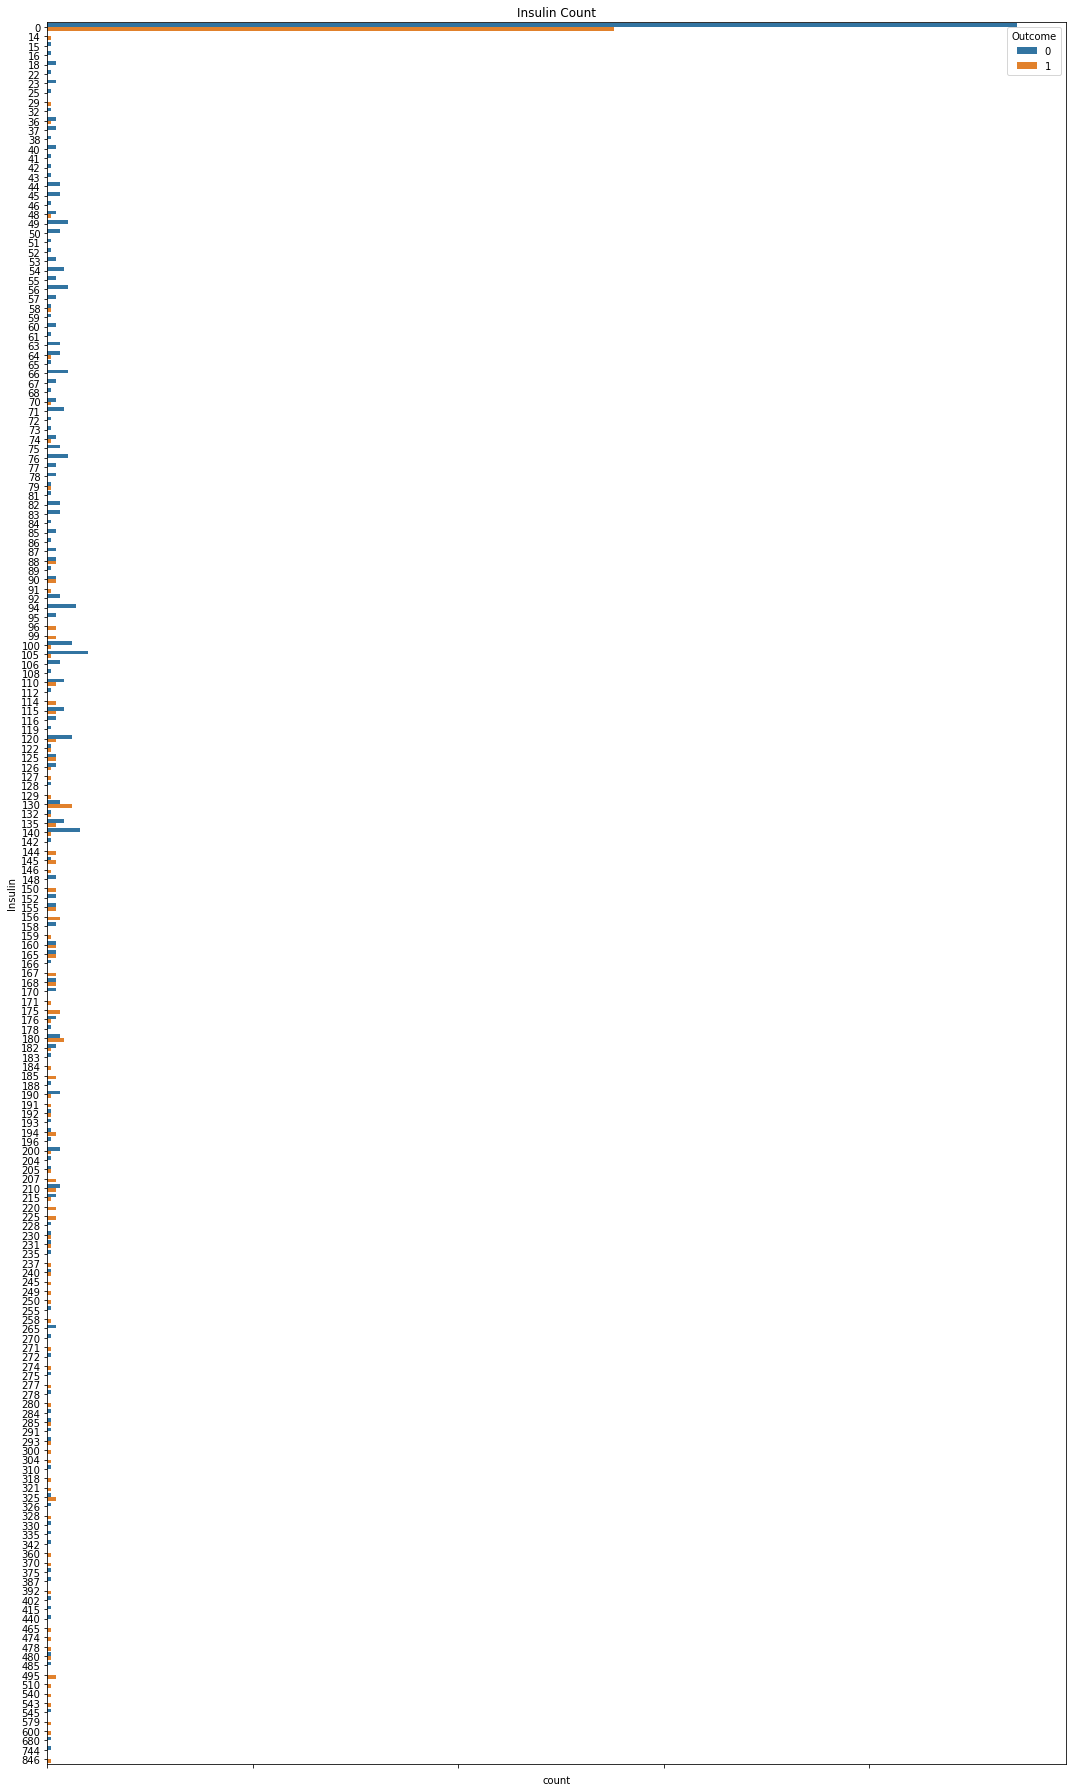

In [9]:
'''
  The insulin chart was pretty big so I made it flip axes to make it easier
'''

#Insulin
insulin_fig, ax_count_insulin = plt.subplots(nrows = 1, figsize = (15, 25))

insulin_sns_countplot = sns.countplot(y = diabetes["Insulin"], ax = ax_count_insulin, data = diabetes, hue = "Outcome")
ax_count_insulin.set_title("Insulin Count")
insulin_sns_countplot.tick_params(axis = "x", which = "major")
insulin_sns_countplot.set_xticklabels(insulin_sns_countplot.get_xticklabels(), rotation = 45)

insulin_fig.tight_layout()
plt.show()

The horizontal orientation actually is a lot better for this.  The numbers along the y axis were very squished when I had them over on the y axis so the flip makes it more readable.

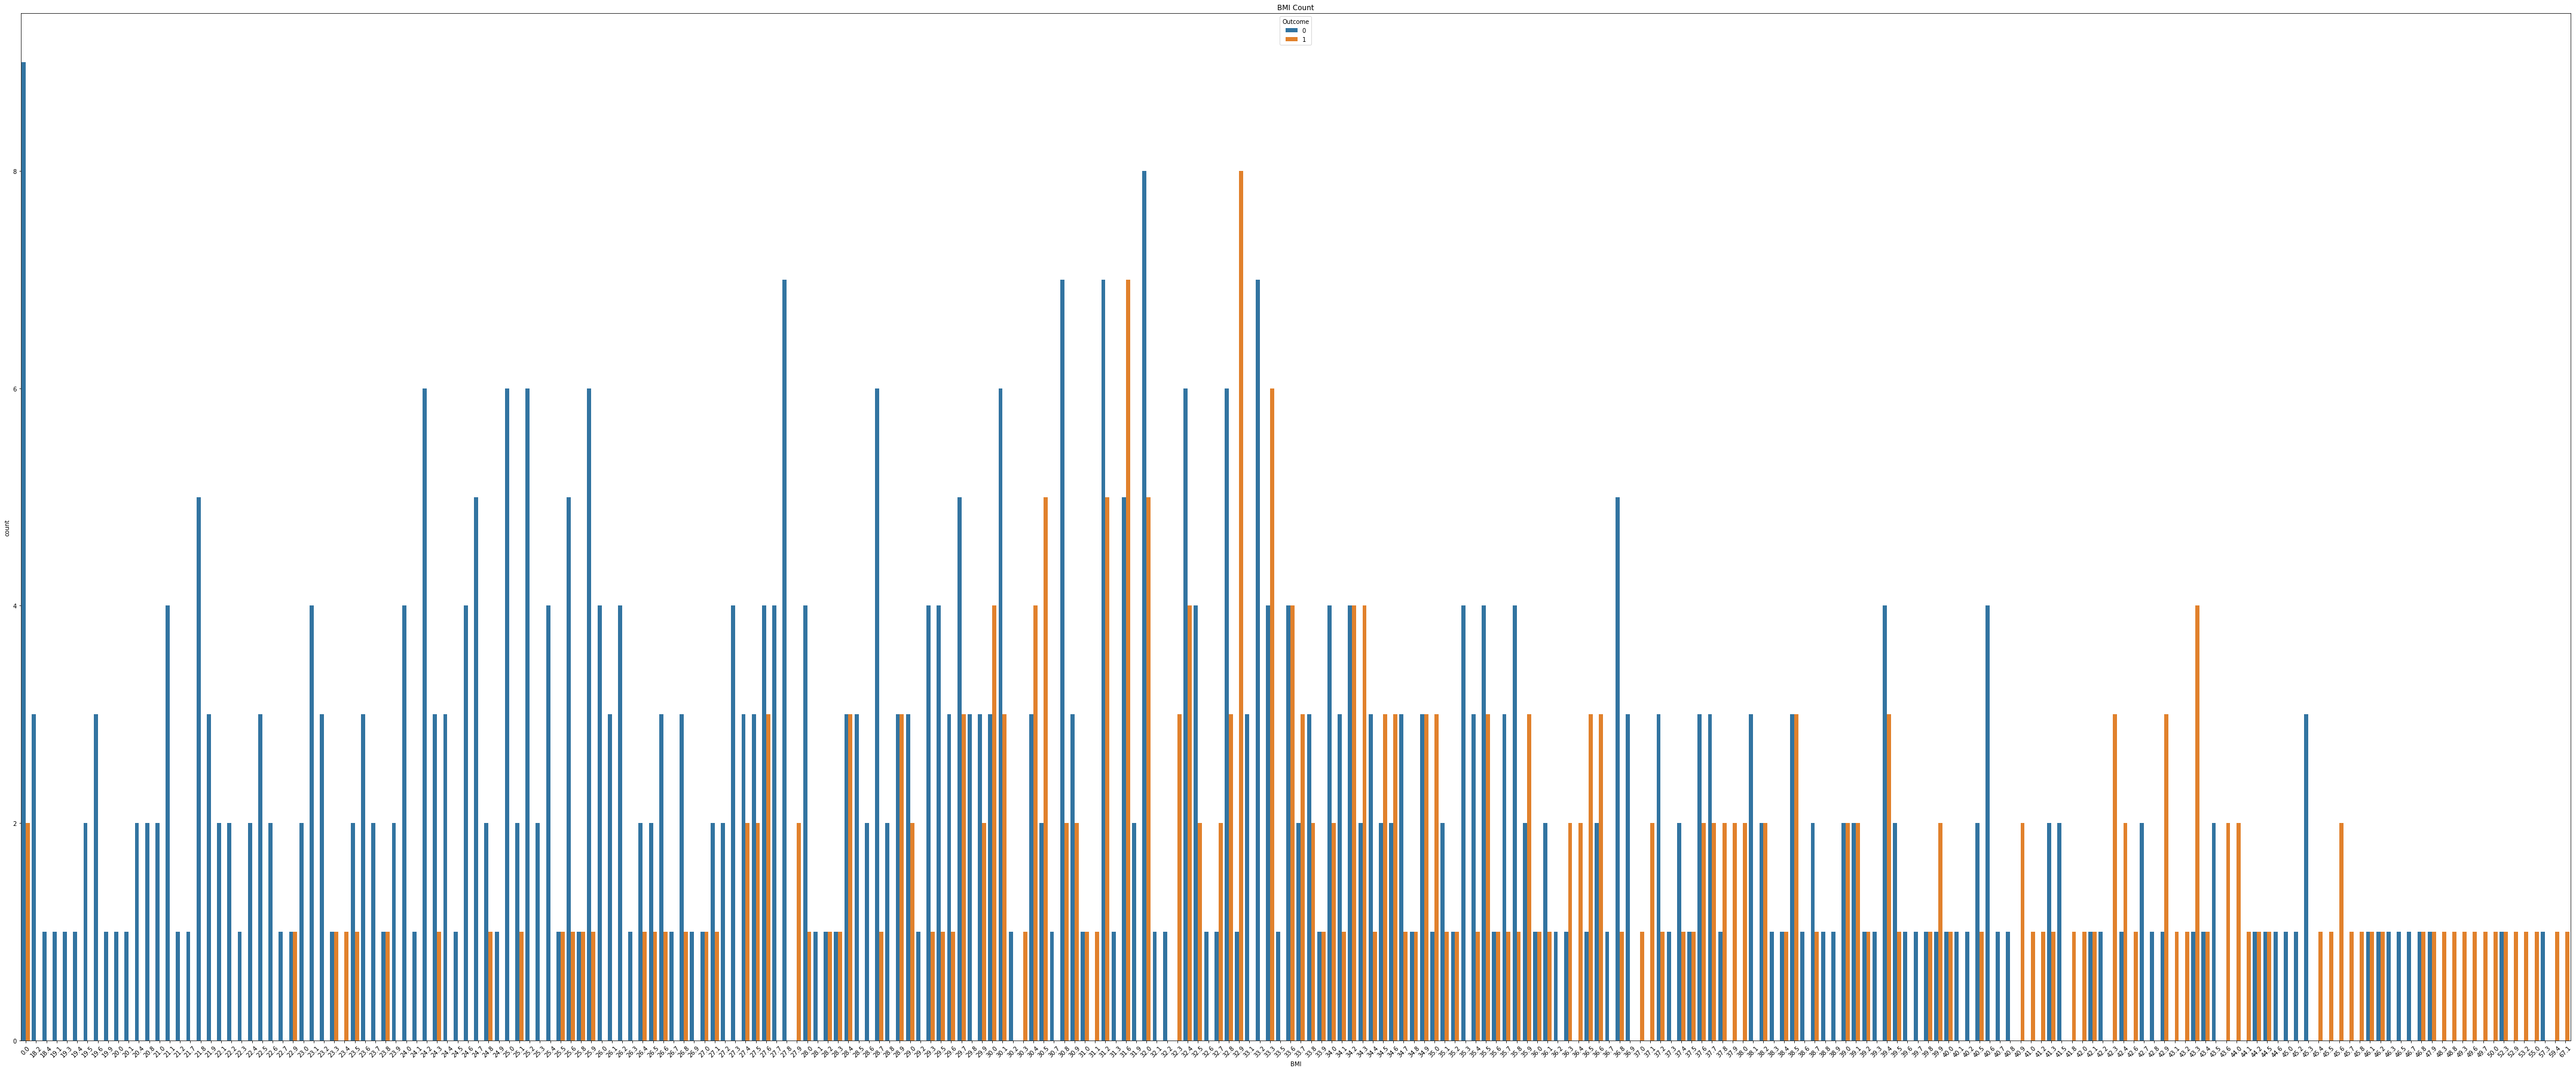

In [10]:
'''
  The BMI chart was huge also so it is separate
'''

#BMI
bmi_fig, ax_count_bmi = plt.subplots(nrows = 1, figsize = (60, 25))

bmi_sns_countplot = sns.countplot(x = diabetes["BMI"], ax = ax_count_bmi, data = diabetes, hue = "Outcome")
ax_count_bmi.set_title("BMI Count")
bmi_sns_countplot.tick_params(axis = "x", which = "major")
bmi_sns_countplot.set_xticklabels(bmi_sns_countplot.get_xticklabels(), rotation = 45)

bmi_fig.tight_layout()
plt.show()

Ok this last one was a big one to see correctly and it is still somewhat bad, but we can not see all of the columns as countplots based on the outcome hue.

I apologize for how big those charts were, but I wanted to display the count plots for as much as I could.

#Histograms

- Kaggle shows us this, however, I still wanted to build the graphs to develop the underlying intuition behind which charts make sense.

In [11]:
def histograms():
  '''
  Summary: This will plot the data in histograms

  Description: A histogram can be a great way to see the distribution of your data

  Parameters: None

  Return: None, but we do see a bunch of graphs
  '''
  fig, ax_histogram = plt.subplots(nrows = 4, ncols = 2, figsize = (10, 10))

  pregnancies_histogram = sns.histplot(data = diabetes["Pregnancies"], ax = ax_histogram[0][0])
  ax_histogram[0][0].set_title("Pregnancies / Outcome")
  pregnancies_histogram.tick_params(axis = "x")

  glucose_histogram = sns.histplot(data = diabetes["Glucose"], ax = ax_histogram[0][1])
  ax_histogram[0][1].set_title("Glucose / Outcome")
  glucose_histogram.tick_params(axis = "x")
  
  blood_pressure_histogram = sns.histplot(data = diabetes["BloodPressure"], ax = ax_histogram[1][0])
  ax_histogram[1][0].set_title("Blood Pressure / Outcome")
  blood_pressure_histogram.tick_params(axis = "x")

  skin_thickness_histogram = sns.histplot(data = diabetes["SkinThickness"], ax = ax_histogram[1][1])
  ax_histogram[1][1].set_title("SkinThickness / Outcome")
  skin_thickness_histogram.tick_params(axis = "x")

  insulin_histogram = sns.histplot(data = diabetes["Insulin"], ax = ax_histogram[2][0])
  ax_histogram[2][0].set_title("Insulin / Outcome")
  insulin_histogram.tick_params(axis = "x")

  bmi_histogram = sns.histplot(data = diabetes["BMI"], ax = ax_histogram[2][1])
  ax_histogram[2][1].set_title("BMI / Outcome")
  bmi_histogram.tick_params(axis = "x")

  dpf_histogram = sns.histplot(data = diabetes["DiabetesPedigreeFunction"], ax = ax_histogram[3][0])
  ax_histogram[3][0].set_title("DiabetesPedigreeFunction / Outcome")
  dpf_histogram.tick_params(axis = "x")

  age_histogram = sns.histplot(data = diabetes["Age"], ax = ax_histogram[3][1])
  ax_histogram[3][1].set_title("Age / Outcome")
  age_histogram.tick_params(axis = "x")

  fig.tight_layout()
  plt.show()

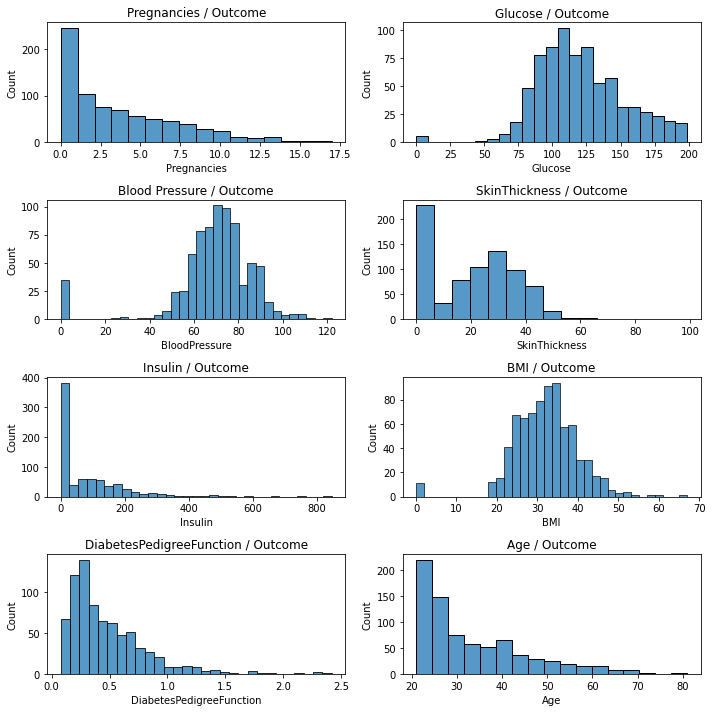

In [12]:
histograms()

# *Displots*

- A distplot is a great way to visualize the histrogram type of graph but with a kde curve

In [13]:
def distplots():
  '''
  Summary: The distplot is used to see the distributions more clearly

  Description: It is important to know what data needs to be normalized and standardized and this can show us

  Parameters: None

  Return: None, but we do see a lot graphs
  '''

  fig, ax_distplots = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 6))
  pregnancies_distplot = sns.distplot(diabetes["Pregnancies"], ax = ax_distplots[0][0])

  glucose_distplot = sns.distplot(diabetes["Glucose"], ax = ax_distplots[0][1])

  blood_pressure_distplot = sns.distplot(diabetes["BloodPressure"], ax = ax_distplots[0][2])

  skin_thickness_distplot = sns.distplot(diabetes["SkinThickness"], ax = ax_distplots[1][0])

  insulin_distplot = sns.distplot(diabetes["Insulin"], ax = ax_distplots[1][1])

  bmi_distplot = sns.distplot(diabetes["BMI"], ax = ax_distplots[1][2])

  dpf_distplot = sns.distplot(diabetes["DiabetesPedigreeFunction"], ax = ax_distplots[2][0])

  age_distplot = sns.distplot(diabetes["Age"], ax = ax_distplots[2][1])
  
  fig.tight_layout()
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

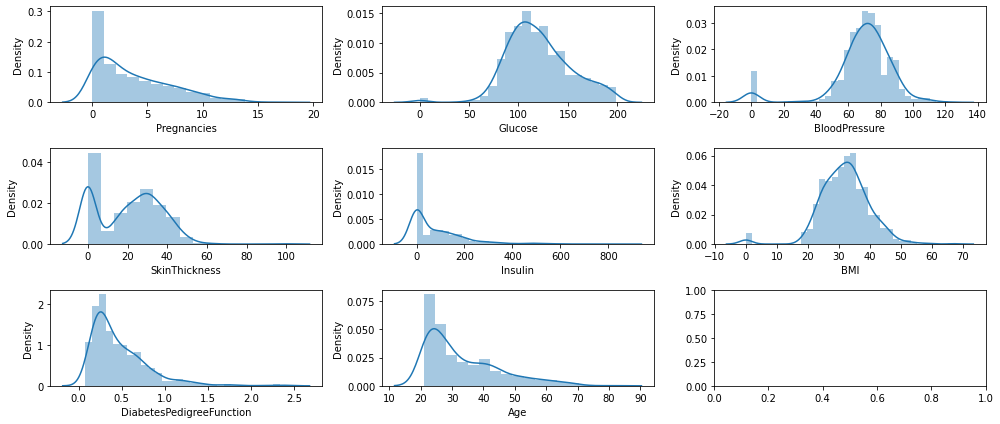

In [14]:
distplots()

Okay we have distplots, now what?  A distplot can show us the distribution (hence dist in distplot) of the data.  Why do we want to see this?  Well we can easily see if we will need to standardize this data or not.  We can see something such as skin thickness having two peaks  I can easily see two bumps there so we need to check the standard deviations.  We can use the dataframe.describe() method to see how many standard deviations we are.

In [15]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Yikes.  We have to standardize the data if we wish to help our model learn better.  The plots have familiarized us with the data and it is now time to normalize and standardize.

#Normalize and Standardize

This data needs to be properly taken care of if we are going to expect a machine learning model to find helpful patterns.

Fortunately, we are already dealing with numbers and have no categorical data to handle 👍.



In [16]:
#We can copy the dataset so we can feel free to do whatever we want because we can always make another copy

#Let's call this diabetes_normalized so we can tell the normalized one from the original
diabetes_normalized = diabetes.copy()

def normalize():
  '''
  Summary: Quickly normalize the data

  Description: We need to make our data on a 0 to 1 scale to make it easier to find patterns

  Parameters: None

  Returns: None, but we see the normalized columns
  '''
  column = 'Pregnancies'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

  column = 'Glucose'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

  column = 'BloodPressure'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

  column = 'SkinThickness'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

  column = 'Insulin'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

  column = 'BMI'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

  column = 'Age'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

  column = 'DiabetesPedigreeFunction'
  diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 


  print(diabetes_normalized.head())

In [17]:
normalize()

   Pregnancies   Glucose  ...       Age  Outcome
0     0.352941  0.743719  ...  0.617284        1
1     0.058824  0.427136  ...  0.382716        0
2     0.470588  0.919598  ...  0.395062        1
3     0.058824  0.447236  ...  0.259259        0
4     0.000000  0.688442  ...  0.407407        1

[5 rows x 9 columns]


In [18]:
def splitting_data_into_train_and_test():
  '''
  Summary: This splits the data into train and test sets

  Description: We can call this whenever we want to train models

  Parameters: None

  Return: The training set and test set
  '''
  X = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "SkinThickness", "DiabetesPedigreeFunction", "Age"]]
  y = diabetes_normalized["Outcome"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

  return X_train, X_test, y_train, y_test

In [19]:
def standardize():
  '''
  Summary: Standardize the data

  Description: This will standardize the data for us

  Parameters: None

  Return: The scaled dataset
  '''
  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()

  #The outcome is either a 1 or a 0 so we only need to scale the training data sample
  scaler = StandardScaler().fit(X_train) 
  X_scaled = scaler.transform(X_train)
  print(X_scaled)
  return

standardize()

[[-0.23288296 -0.19254286 -0.14765856 ...  1.16039156 -0.96082409
  -0.44505367]
 [-0.23288296 -0.25623969 -0.97092627 ... -0.66825983  0.5132899
  -0.70244421]
 [ 0.36918077  1.17693899  0.77851761 ...  1.28650544 -0.20208895
  -0.35925682]
 ...
 [-0.83494668 -0.38363335 -0.45638395 ... -0.79437372  1.50738778
  -1.04563159]
 [ 0.36918077 -0.70211751 -0.76510934 ...  0.46676517  0.11998637
  -0.27345998]
 [ 2.47640381 -1.17984374  0.16106683 ...  0.655936   -0.50558301
   1.09928955]]


# Model time!

Okay - we have plotted our data, found correlations, split and preped the data thanks to scikit - learn.

Now lets build some models.

- Model 1
  - A small dense network 
  - Why a small dense network?  Why not.  A small dense network can be great for finding the patterns in data like this, however, a traditional machine learning model may be better.

- Model 2
  - A random forest classification
  - A random forest is almost always good on this type of data.  The data flows in a noticeable if else statements.  If you have x amount of pregnancies traverse left else right, if you have y glucose levels traverse left else right, etc.

- Model 3
  - A logistic regression pipeline
  - I wanted to build a pipeline to have the experince doing that in a project that was not a YouTube tutorial so here it is.

- Model 4
  - An SVM
  - We can use this for a classification model or regression.  A classification task we assign a label to input.  We are trying to assign a 1 or 0 to the data.

- Model 5
  - An XGBoost model
  - I have never use an XGBoost model before and I wanted to try it

#Dense Network

- The dense network will consist of four total layers (Input, Dense, Dropout, Dense).  Many people may call this a three layer network since we do not include the input layer, but that is okay for now.

- The network will use
  - The Adam optimizer (Adam, at the moment, is the go to optimizer so let's use it.)
  - The binary cross entropy loss function (we are classifying a 1 or 0, a binary problem so this is fitting.)
  - We will also track the accuracy since that is the optimal metric to watch in this problem.
  - We use 1000 epochs to ensure the model sees the data plenty of times.
  - We use a batch size of 10
  - We shuffle the data after every epoch to help prevent the model from memorizing the dataset
  - The validation split is 20% (a commonly used percentage)
  - The output is verbose so we can see it training.
    - **FAIR WARNING** 1,000 epochs will make the notebook drag on so if you wish to change this then make the verbosity 0 to not see the training.

In [20]:
def dense_network():
  '''
  Summary: This is the dense network

  Description: Thanks to Tensorflow / Keras, I am going to make a small dense network with checkpoints to save it

  Parameters: None

  Return: The trained model and its history for plotting use
  '''

  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()

  dense_model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = (768, 8)),                          
      tf.keras.layers.Dense(768, activation = "relu"),
      tf.keras.layers.Dropout(0.8),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  dense_model.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
                      loss = "binary_crossentropy",
                      metrics = ["accuracy"])


  checkpoint_path = "model_checkpoints/checkpoint"

  checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                               monitor = "val_loss",
                               frequency = "epoch",
                               save_best_only = True,
                               verbose = 1)
  
  history = dense_model.fit(x = X_train,
                            y = y_train,
                            epochs = 1000,
                            batch_size = 10,
                            shuffle = True,
                            validation_split = 0.2,
                            verbose = 1,
                            callbacks = [checkpoint]
                            )
  
  return history

In [21]:
dense_history = dense_network()

Epoch 1/1000
50/50 [==============================] - 1s 13ms/step - loss: 0.6984 - accuracy: 0.4772 - val_loss: 0.6863 - val_accuracy: 0.6341

Epoch 00001: val_loss improved from inf to 0.68634, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.6326 - val_loss: 0.6769 - val_accuracy: 0.6341

Epoch 00002: val_loss improved from 0.68634 to 0.67693, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.6171 - val_loss: 0.6721 - val_accuracy: 0.6341

Epoch 00003: val_loss improved from 0.67693 to 0.67209, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 4/1000
50/50 [==============================] - 0s 4

In [22]:
def plot_dense_network():
  '''
  Summary: This will plot the results of our dense network

  Description: This will plot the accuracy and loss of our training and testing sets

  Parameters: None

  Return: None, but we do see two graphs
  '''
  print(dense_history.history.keys())


  plt.plot(dense_history.history["accuracy"]) #Blue 
  plt.plot(dense_history.history["val_accuracy"]) #Orange
  plt.legend(["Train", "Test"], loc = "lower right")
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")

  plt.show()

  plt.plot(dense_history.history["loss"]) #Blue
  plt.plot(dense_history.history["val_loss"]) #Orange
  plt.legend(["Train", "Test"], loc = "lower left")
  plt.xlabel("Model Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  fig.tight_layout()
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


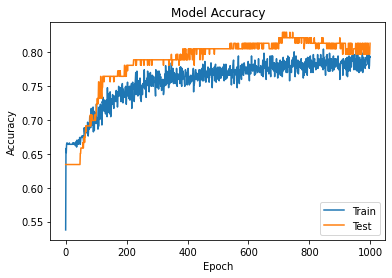

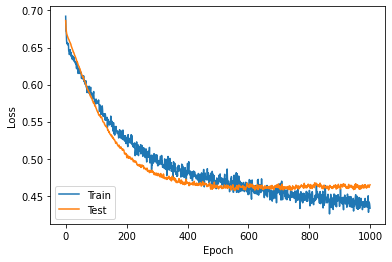

In [23]:
plot_dense_network()

This dense model is actually pretty solid.  We have under 800 rows in the dataset so these graphs are decently strong.  Sweet!  Now let's try the next model, the random forest.

#Random Forest Classification

- We will use the GridSearchCV functionality here.  Why?  Well, it can let us do a hyperparameter sweep to see the best parameters for the RF.

- Okay so what is this code?
  - (Step 1) The first step is to call our splitting data function 
  - (Step 2) Next we create a random forest classifer
  - (Step 3) Then we make our parameter grid
  - (Step 4) Now we need to build and fit the GridSearchCV to find the best parameters
  - (Step 5) Then we take the best parameters and fit the random forest on those best parameters
  - (Step 6) Finally we make a prediction and print the accuracy and mean absolute error.

- **FAIR WARNING** This will take a long time to train.  The parameter grid is combing through a wide range.

In [24]:
def random_forest_grid():
  '''
  Summary: This is the random forest

  Description: This is the grid search cv for the random forest.  The grid search
               is a bit overkill but I wanted to do it.

  Parameters: None

  Return: None, but it prints the best parameters
  '''
  # Step 1
  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()

  #Step 2
  random_forest_classifier = RandomForestClassifier()

  #Step 3 - The range of parameters to sweep through
  param_grid = {
      "n_estimators": [1, 5000],
      "max_features": ["auto", "sqrt", "log2"],
      "max_depth"   : [1, 2, 3, 4, 5],
      "criterion"   : ["gini", "entropy"]
  }

  #Step 4
  cv_rf = GridSearchCV(estimator = random_forest_classifier, param_grid = param_grid, cv = 5)

  cv_rf.fit(X_train, y_train)

  print(cv_rf.best_params_)

def random_forest_with_best_params(n_estimators, max_depth):
  '''
  Summary: This is the random forest with the best parameters

  Description: This is the random forest we will train with the best parameters from the before method

  Parameters: n_estimators, max_depth

  Return: The random forest model
  '''
  #Step 5 - Use the best parameters to update this
  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()

  random_forest_classifier = RandomForestClassifier()
  random_forest_classifier = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
  random_forest_classifier.fit(X_train, y_train)
  pred = random_forest_classifier.predict(X_test)

  #Step 6
  print("Accuracy for Random Forest on CV_1 data: ", accuracy_score(y_test, pred))
  print("Mean Absolute Error of CV_1: ", mean_absolute_error(y_test, pred))
  return random_forest_classifier

In [25]:
random_forest_grid()

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 5000}


Okay the random_forest_grid came back with 
  - n_estimator = 5000
  - max_features = sqrt
  - max_depth = 5
  - criterion = entropy

Are there better hyperparameters out there - probably.  However, we did a wide range sweep so we are going to be okay with what we have.

In [26]:
random_forest_with_best_params(n_estimators = 5000, max_depth = 5)

Accuracy for Random Forest on CV_1 data:  0.7987012987012987
Mean Absolute Error of CV_1:  0.2012987012987013


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Logistic Regression 

- We will use the GridSearchCV functionality here.  Why?  Well, it can let us do a hyperparameter sweep to see the best parameters for the LR similarly to the RF.

- Okay so what is this code?
  - (Step 1) The first step is to call our splitting data function 
  - (Step 2) Then we make our parameter grid
  - (Step 3) Now we need to build and fit the GridSearchCV to find the best parameters
  - (Step 4) Then we take the best parameters and fit the random forest on those best parameters
  - (Step 5) Finally we make a prediction and print the accuracy and mean absoulte error.

- **FAIR WARNING** This will take a long time to train.  The parameter grid is combing through a wide range.

In [27]:
def logistic_reg():
  '''
  Summary: This is the logistic regression model

  Description: This will show us how to use grid search on a logistic regression problem

  Params: None

  Return: None, but it prints the best parameters like our random forest
  '''
  #Step 1
  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()
  
  #Step 2
  param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
  
  #Step 3
  logistic_regression_grid_search = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
  
  lr_gs = GridSearchCV(cv=None,
                       estimator=LogisticRegression(C=10, 
                                            intercept_scaling=1, 
                                            dual=False, 
                                            fit_intercept=True,
                                            penalty='l2',
                                            tol=0.0001),
                        param_grid= param_grid)
  
  lr_gs.fit(X_train, y_train)

  print(lr_gs.best_params_)

def logistic_reg_with_best_params():
  '''
  Summary: This is the logistic regression with the best parameters

  Description: This will show us the logistic regression model with the apparent best parameters.
               Are there better parameters?  Probably.

  Paramters: None

  Return: The logistic regression model
  '''

  #Step 5 - Use the best parameters to update this
  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()

  logistic_regresion_with_best_params = LogisticRegression()

  logistic_regression_with_best_params = LogisticRegression(C = 10)
  logistic_regression_with_best_params.fit(X_train, y_train)
  logistic_regression_with_best_params_preds = logistic_regression_with_best_params.predict(X_test)

  #Step 6
  print("Accuracy for Random Forest on CV_1 data: ", accuracy_score(y_test, logistic_regression_with_best_params_preds))
  print("Mean Absolute Error of CV_1: ", mean_absolute_error(y_test, logistic_regression_with_best_params_preds))

  return logistic_regression_with_best_params

In [28]:
logistic_reg()

{'C': 10}


In [29]:
logistic_reg_with_best_params()

Accuracy for Random Forest on CV_1 data:  0.7987012987012987
Mean Absolute Error of CV_1:  0.2012987012987013


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Okay we have an accuracy of about 80%.  That is not bad, but I am sure we could be better.  The dense network seems to be the best so far.

# SVM

- We will use the GridSearchCV functionality here.  Why?  Well, it can let us do a hyperparameter sweep to see the best parameters for the SVM just like our previous two models.

- Okay so what is this code?
  - (Step 1) The first step is to call our splitting data function and make a support vector machine
  - (Step 2) Then we make our parameter grid
  - (Step 3) Now we need to build and fit the GridSearchCV to find the best parameters
  - (Step 4) Then we take the best parameters and fit the support vector machine on those best parameters
  - (Step 5) Finally we make a prediction and print the accuracy and mean absoulte error.

- I kept this as one method since the training is pretty quick

In [30]:
def svm_model():
  '''
  Summary: This is the Support Vector Machine

  Description: This is the Support Vector Machine with a grid search

  Parameters: None

  Return: None, but it does train our model in one method since it is faster/
  '''

  #Step 1
  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()

  svm = SVC()

  #Step 2
  param_grid = {
      "C": [0.1, 1, 10, 100, 1000],
      'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
      "kernel": ["rbf"]
  }

  #Step 3
  svm_grid = GridSearchCV(svm, 
                          param_grid, 
                          refit = True, 
                          verbose = 3)
  
  svm_grid.fit(X_train, y_train)

  #Step 4
  print(svm_grid.best_params_)
  print(svm_grid.best_estimator_)

  #Step 5
  svm_grid_predictions = svm_grid.predict(X_test)

  print(classification_report(y_test, svm_grid_predictions))

In [31]:
svm_model()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.675, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.3s finished


The accuracy here is also not too bad.  We are about 80% again.

#XGBoost


- Okay so what is this code?
  - (Step 1) The first step is to call our splitting data function and make a support vector machine
  - (Step 2) We will build an XGBoost classifier and use these arguments and fit the model:
    - objective = binary:logistic
    - estimators = 500, 
    - max_depth = 5, 
    - seed = 123
  - (Step 3) We need to calculate the accuracy and the mean absolute error to see how we did.
  - (Step 4) Now we can use kfold and cross val score to measure the accuracy and mean absolute error.  Kfold and cross val score are two validation techniques so we can measure our validation metrics.

- `Note` I am not using a GridSearchCV here.  I decieded not to since this was my first foray into XGBoost and I wanted to play around with it rather than use it as a serious model although it could be.

In [32]:
def xgboost():
  '''
  Summary: This is the XGBoost model

  Description: This is the XGBoost model I made for this project.  I have never used XGBoost so I gave it a go.

  Parameters: None:

  Return: None, but it does print the results of the model in one function for us
  '''
  #Step 1
  X_train, X_test, y_train, y_test = splitting_data_into_train_and_test()

  #Step 2
  xg_cl = xgb.XGBClassifier(objective = "binary:logistic",
                            n_estimators = 500,
                            max_depth = 5,                        
                            seed = 123)

  xg_cl.fit(X_train, y_train)

  #Step 3
  xgboost_preds = xg_cl.predict(X_test)
  accuracy = float(np.sum(xgboost_preds == y_test)) / y_test.shape[0]
  mae = mean_absolute_error(y_test, xgboost_preds)

  print("Accuracy: %f" % (accuracy))
  print("Mean Absolute Error: %f" % (mae))

  #Step 4
  kfold = KFold(n_splits = 10, random_state = 7)
  results = cross_val_score(xg_cl, X_train, y_train, cv = kfold)

  print("Accuracy: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

In [33]:
xgboost()

Accuracy: 0.772727
Mean Absolute Error: 0.227273


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 72.65% (4.13%)


#Future Additions?

- Feature Engineering ideas with the HOMA IR

- Balance Class Imbalance

- A pipeline for the random forest to normalize and standardize better

- Make the splitting data function into a global variable so I do not have to call it all the time

#What you did not see

- I am going to be transparent and say there was a lot of work I did behind the scences to make a clean and easy to read notebook.  I had tried all sorts of plots in addition to these (bar, line, pie, scatter, regplot, and violin).  I decided to remove a heavy amount to make this easy for anyone that wants to learn from this.


- I have all of my plots in my GitHub accompanying this work.  If you wish to see some really weird plots then head over to my [GitHub](https://github.com/alexantaki16/diabetes_pima).  (You need to go to the master branch so switch branches to see it.  I am trying to fix this.)